In [1]:
# Setup imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
sns.set()

In [2]:
# Import data

developed_countries_data=pd.read_csv('./developer_countries_WEO_Data.csv')
africa_countries_data=pd.read_csv('./africa_WEO_Data.csv')

In [3]:
developed_countries_data

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Estimates Start After
0,Canada,Implied PPP conversion rate,National currency per current international do...,NaN,"See notes for: Gross domestic product, curren...",1.119,1.127,1.156,1.176,1.176,...,1.208,1.216,1.207,1.209,1.208,1.209,1.211,1.213,1.214,2018
1,Canada,"Inflation, average consumer prices",Index,NaN,Source: National Statistics Office Latest actu...,44.037,49.525,54.876,58.067,60.587,...,128.375,130.433,133.358,136.043,138.801,141.582,144.625,147.728,150.664,2018
2,Canada,"Inflation, average consumer prices",Percent change,NaN,"See notes for: Inflation, average consumer pr...",10.183,12.462,10.803,5.816,4.339,...,1.435,1.603,2.243,2.013,2.027,2.004,2.149,2.146,1.987,2018
3,Canada,"Inflation, end of period consumer prices",Index,NaN,Source: National Statistics Office Latest actu...,45.867,51.533,56.500,59.133,61.300,...,129.100,131.467,134.167,137.161,139.802,142.683,145.807,148.854,151.767,2018
4,Canada,"Inflation, end of period consumer prices",Percent change,NaN,"See notes for: Inflation, end of period consu...",7.337,12.355,9.638,4.661,3.664,...,1.414,1.833,2.054,2.232,1.926,2.061,2.190,2.089,1.957,2018
5,Canada,Current account balance,U.S. dollars,Billions,Source: National Statistics Office Latest actu...,-6.088,-12.534,1.846,-2.521,-1.299,...,-48.945,-46.327,-45.162,-32.477,-30.187,-32.241,-33.284,-34.218,-36.361,2018
6,Canada,Current account balance,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-2.206,-4.079,0.587,-0.737,-0.364,...,-3.199,-2.808,-2.637,-1.876,-1.666,-1.687,-1.653,-1.612,-1.624,2018
7,France,Implied PPP conversion rate,National currency per current international do...,NaN,"See notes for: Gross domestic product, curren...",0.784,0.800,0.844,0.891,0.921,...,0.817,0.805,0.792,0.787,0.782,0.778,0.774,0.772,0.769,2018
8,France,"Inflation, average consumer prices",Index,NaN,Source: National Statistics Office Latest actu...,35.583,40.327,45.158,49.430,53.223,...,100.304,101.471,103.603,104.812,106.209,107.724,109.437,111.274,113.155,2018
9,France,"Inflation, average consumer prices",Percent change,NaN,"See notes for: Inflation, average consumer pr...",13.057,13.333,11.978,9.460,7.674,...,0.307,1.163,2.102,1.167,1.332,1.426,1.591,1.678,1.691,2018


In [4]:
# Drop estimates column
# melt yearly data
# Sort data
melted_developed = developed_countries_data.drop(columns=['Estimates Start After']).melt(var_name="year", id_vars=['Country','Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes'])
melted_developed.sort_values(['Country', 'Subject Descriptor', 'Units'], ascending=True)

melted_africa=africa_countries_data.drop(columns=['Estimates Start After']).melt(var_name="year", id_vars=['Country','Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes'])
melted_africa.sort_values(['Country', 'Subject Descriptor', 'Units'], ascending=True)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,year,value
6,Angola,Current account balance,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",1980,1.051
321,Angola,Current account balance,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",1981,-2.947
636,Angola,Current account balance,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",1982,-7.958
951,Angola,Current account balance,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",1983,-5.549
1266,Angola,Current account balance,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",1984,-2.488
...,...,...,...,...,...,...,...
12912,Zimbabwe,"Inflation, end of period consumer prices",Percent change,NaN,"See notes for: Inflation, end of period consu...",2020,9.429
13227,Zimbabwe,"Inflation, end of period consumer prices",Percent change,NaN,"See notes for: Inflation, end of period consu...",2021,3
13542,Zimbabwe,"Inflation, end of period consumer prices",Percent change,NaN,"See notes for: Inflation, end of period consu...",2022,3
13857,Zimbabwe,"Inflation, end of period consumer prices",Percent change,NaN,"See notes for: Inflation, end of period consu...",2023,3


In [5]:
melted = melted_developed.append(melted_africa)
# Convert to nums
melted.apply(lambda x: pd.to_numeric if x.name in ['values', 'year'] else x)
# Drop null value rows
melted.dropna(subset=['value', 'year', 'Country'])

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,year,value
0,Canada,Implied PPP conversion rate,National currency per current international do...,NaN,"See notes for: Gross domestic product, curren...",1980,1.119
1,Canada,"Inflation, average consumer prices",Index,NaN,Source: National Statistics Office Latest actu...,1980,44.037
2,Canada,"Inflation, average consumer prices",Percent change,NaN,"See notes for: Inflation, average consumer pr...",1980,10.183
3,Canada,"Inflation, end of period consumer prices",Index,NaN,Source: National Statistics Office Latest actu...,1980,45.867
4,Canada,"Inflation, end of period consumer prices",Percent change,NaN,"See notes for: Inflation, end of period consu...",1980,7.337
...,...,...,...,...,...,...,...
14170,Zimbabwe,"Inflation, average consumer prices",Percent change,NaN,"See notes for: Inflation, average consumer pr...",2024,3
14171,Zimbabwe,"Inflation, end of period consumer prices",Index,NaN,Source: National Statistics Office Latest actu...,2024,299.834
14172,Zimbabwe,"Inflation, end of period consumer prices",Percent change,NaN,"See notes for: Inflation, end of period consu...",2024,3
14173,Zimbabwe,Current account balance,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,2024,-0.456


In [6]:
countries = melted_africa['Country'].unique()

melted_africa.apply(lambda x: pd.to_numeric if x.name in ['value', 'year'] else x)
# Drop null value rows
melted_africa.dropna(subset=['value', 'year', 'Country'])

melted_africa
# for country in countries:
#     melted_africa.groupby(['Country', 'Subject Descriptor', 'Units']).get_group((country, 'Inflation, average consumer prices', 'Index')).plot(x='year', y='value', title=country)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,year,value
0,Angola,Implied PPP conversion rate,National currency per current international do...,NaN,"See notes for: Gross domestic product, curren...",1980,--
1,Angola,"Inflation, average consumer prices",Index,NaN,Source: National Statistics Office Latest actu...,1980,--
2,Angola,"Inflation, average consumer prices",Percent change,NaN,"See notes for: Inflation, average consumer pr...",1980,46.708
3,Angola,"Inflation, end of period consumer prices",Index,NaN,Source: National Statistics Office Latest actu...,1980,--
4,Angola,"Inflation, end of period consumer prices",Percent change,NaN,"See notes for: Inflation, end of period consu...",1980,NaN
...,...,...,...,...,...,...,...
14170,Zimbabwe,"Inflation, average consumer prices",Percent change,NaN,"See notes for: Inflation, average consumer pr...",2024,3
14171,Zimbabwe,"Inflation, end of period consumer prices",Index,NaN,Source: National Statistics Office Latest actu...,2024,299.834
14172,Zimbabwe,"Inflation, end of period consumer prices",Percent change,NaN,"See notes for: Inflation, end of period consu...",2024,3
14173,Zimbabwe,Current account balance,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,2024,-0.456


DataError: No numeric types to aggregate

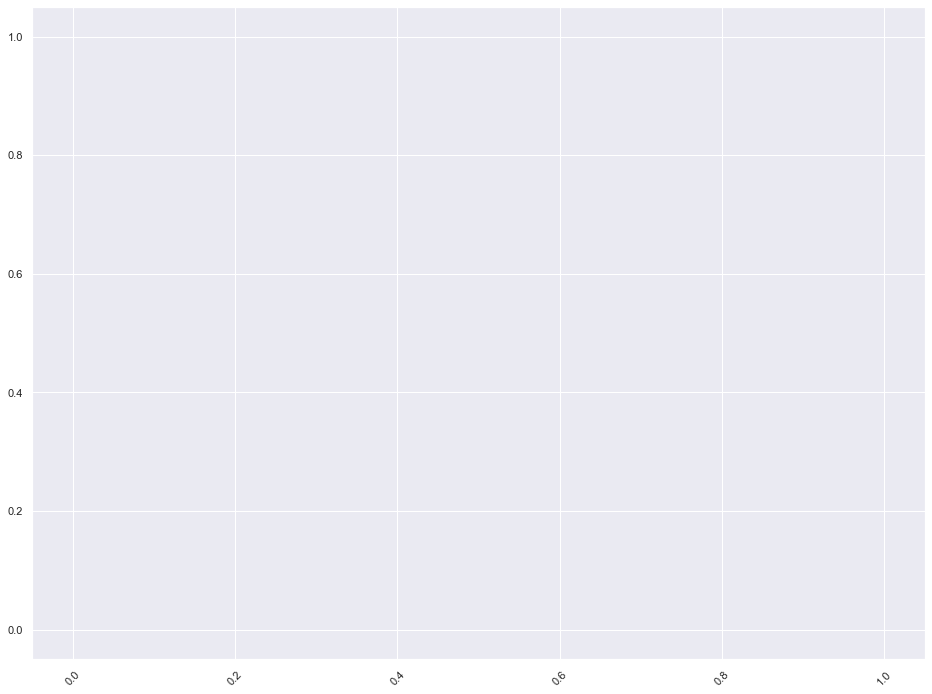

In [7]:
a4_dims = (16, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
pyplot.setp(ax.get_xticklabels(), rotation=45)
countries = melted['Country'].unique()

for country in countries:
    fresh_data=melted.groupby(['Country', 'Subject Descriptor', 'Units']).get_group((country, 'Inflation, average consumer prices', 'Index'))
    sns.lineplot(data=fresh_data, x='year', y='value', legend='full')
    
    
pyplot.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3'])
